In [1]:
import os
import torch
import numpy as np
import pytorch_lightning as pl
import matplotlib.pyplot as plt

from utils import tools, metrics, criterion
from modules.vae_base_module import VAEBaseModule
from models import supported_models
from datasets import supported_datamodules

plt.style.use('seaborn')
config_file = '../configs/vae/vae_simple_mnist.yaml'
log_path = '../logs/NoveltyMNISTDataModule/SimpleVAE/version_0'
model_path = log_path + '/checkpoints/last.ckpt'
train_recons_path = '../logs/NoveltyMNISTDataModule/SimpleVAE/version_0/train_recons.pt'

In [2]:
config = tools.load_config(config_file)
exp_params = config['experiment-parameters']
data_params = config['data-parameters']
module_params = config['module-parameters']

datamodule = supported_datamodules[exp_params['datamodule']](**data_params)
datamodule.setup('test')

model = supported_models[exp_params['model']](datamodule.data_shape, **module_params)

module = VAEBaseModule(model, **module_params)

checkpoint = torch.load(model_path)
module.load_state_dict(checkpoint['state_dict'])

Experimental parameters
------
{'data-parameters': {'batch_size': 128,
                     'root_data_path': '/home/sleipnir/Documents/Datasets/NoveltyMNIST',
                     'train_fraction': None},
 'experiment-parameters': {'datamodule': 'NoveltyMNISTDataModule',
                           'log_dir': 'logs',
                           'model': 'SimpleVAE',
                           'patience': None},
 'module-parameters': {'latent_nodes': 10, 'learning_rate': 0.001}}


<All keys matched successfully>

In [3]:
test_novelty_scores = []
test_novelty_labels = []
score_criterion = criterion.BestLoss(train_recons_path, data_params['batch_size'])

Testing with the Best Loss criterion


In [4]:
module.model.eval()
with torch.no_grad():
    for batch_nb, batch_tuple in enumerate(datamodule.test_dataloader()):
        result = module.test_step(batch_tuple, batch_nb, score_criterion);
        test_novelty_scores.extend(result['scores'].numpy())
        test_novelty_labels.extend(result['labels'].numpy())

2021-05-13 18:37:29,176 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2021-05-13 18:37:29,178 - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,178 - DEBUG - findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,179 - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2021-05-13 18:37:29,180 - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 5.05
2021-05-13 18:37:29,180 - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,181 - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
2021-05-13 18:37:29,181 - DEBUG - findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>

2021-05-13 18:37:29,214 - DEBUG - findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-B.ttf) normal normal 700 normal>) = 10.335
2021-05-13 18:37:29,215 - DEBUG - findfont: score(<Font 'Lohit Gujarati' (Lohit-Gujarati.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,216 - DEBUG - findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
2021-05-13 18:37:29,216 - DEBUG - findfont: score(<Font 'Rasa' (Rasa-Regular.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,217 - DEBUG - findfont: score(<Font 'KacstTitle' (KacstTitle.ttf) normal normal 500 normal>) = 10.145
2021-05-13 18:37:29,217 - DEBUG - findfont: score(<Font 'Nimbus Sans' (NimbusSans-Italic.otf) italic normal 400 normal>) = 11.05
2021-05-13 18:37:29,218 - DEBUG - findfont: score(<Font 'Rasa' (Rasa-SemiBold.ttf) normal normal 600 normal>) = 10.24
2021-05-13 18:37:29,218 - DEBUG - findfont: score(<Font 'Gargi' (Gargi.ttf) normal normal 400 normal>) = 10.05
2021-

2021-05-13 18:37:29,252 - DEBUG - findfont: score(<Font 'Rachana' (Rachana-Bold.ttf) normal normal 700 normal>) = 10.335
2021-05-13 18:37:29,252 - DEBUG - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,253 - DEBUG - findfont: score(<Font 'Keraleeyam' (Keraleeyam-Regular.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,253 - DEBUG - findfont: score(<Font 'Garuda' (Garuda-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
2021-05-13 18:37:29,254 - DEBUG - findfont: score(<Font 'Nimbus Sans' (NimbusSans-BoldItalic.otf) italic normal 700 normal>) = 11.335
2021-05-13 18:37:29,254 - DEBUG - findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,255 - DEBUG - findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335
2021-05-13 18:37:29,255 - DEBUG - findfont: score(<Font 'Sarai' (Sarai.ttf) normal normal 400 n

2021-05-13 18:37:29,289 - DEBUG - findfont: score(<Font 'msam10' (msam10.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,289 - DEBUG - findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 100 normal>) = 10.335
2021-05-13 18:37:29,289 - DEBUG - findfont: score(<Font 'URW Gothic' (URWGothic-Demi.otf) normal normal 600 normal>) = 10.24
2021-05-13 18:37:29,290 - DEBUG - findfont: score(<Font 'Lato' (Lato-HeavyItalic.ttf) italic normal 800 normal>) = 11.43
2021-05-13 18:37:29,290 - DEBUG - findfont: score(<Font 'Lohit Malayalam' (Lohit-Malayalam.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,290 - DEBUG - findfont: score(<Font 'ori1Uni' (utkal.ttf) normal normal 500 normal>) = 10.145
2021-05-13 18:37:29,291 - DEBUG - findfont: score(<Font 'Laksaman' (Laksaman-Bold.ttf) normal normal 700 normal>) = 10.335
2021-05-13 18:37:29,291 - DEBUG - findfont: score(<Font 'D050000L' (D050000L.otf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,291 - DEBUG - f

2021-05-13 18:37:29,319 - DEBUG - findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Regular.otf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,319 - DEBUG - findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
2021-05-13 18:37:29,320 - DEBUG - findfont: score(<Font 'Tlwg Mono' (TlwgMono.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,320 - DEBUG - findfont: score(<Font 'Z003' (Z003-MediumItalic.otf) italic normal 500 normal>) = 11.145
2021-05-13 18:37:29,321 - DEBUG - findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal 300 normal>) = 10.145
2021-05-13 18:37:29,321 - DEBUG - findfont: score(<Font 'KacstBook' (KacstBook.ttf) normal normal 500 normal>) = 10.145
2021-05-13 18:37:29,322 - DEBUG - findfont: score(<Font 'Ubuntu' (Ubuntu-M.ttf) normal normal 500 normal>) = 10.145
2021-05-13 18:37:29,322 - DEBUG - findfont: score(<Font 'Mukti Narrow' (MuktiNarrow.ttf) normal normal 400 normal>) = 10.05
2021-05-13

2021-05-13 18:37:29,357 - DEBUG - findfont: score(<Font 'Bitstream Vera Sans Mono' (VeraMoBd.ttf) normal normal 700 normal>) = 10.335
2021-05-13 18:37:29,358 - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,359 - DEBUG - findfont: score(<Font 'KacstOne' (KacstOne-Bold.ttf) normal normal 700 normal>) = 10.335
2021-05-13 18:37:29,359 - DEBUG - findfont: score(<Font 'Ani' (ani.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,360 - DEBUG - findfont: score(<Font 'AnjaliOldLipi' (AnjaliOldLipi-Regular.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,360 - DEBUG - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
2021-05-13 18:37:29,360 - DEBUG - findfont: score(<Font 'Kalimati' (kalimati.ttf) normal normal 400 normal>) = 10.05
2021-05-13 18:37:29,361 - DEBUG - findfont: score(<Font 'KacstLetter' (KacstLetter.ttf) normal norm

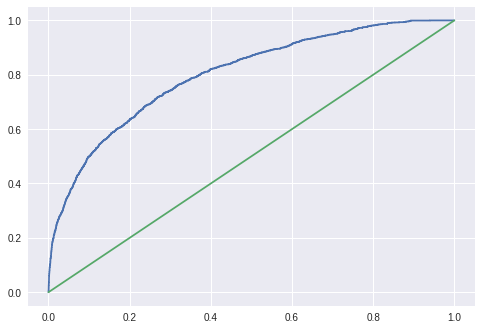

Model ROC AUC:  0.8014129687499999
Random ROC AUC: 0.5


In [5]:
fpr, tpr, thresholds, auc = metrics.roc(test_novelty_scores, test_novelty_labels)

plt.plot(fpr, tpr)
plt.plot([0., 1.], [0., 1.])
plt.show()
print('Model ROC AUC: ', auc)
print('Random ROC AUC: 0.5')

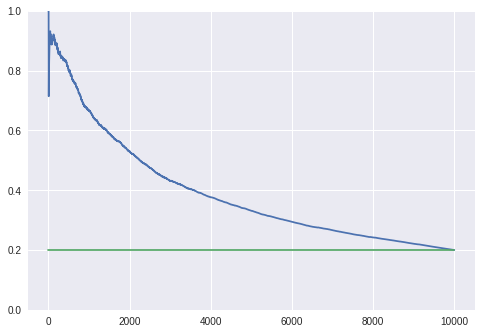

In [6]:
pak = metrics.precision_at_k(test_novelty_scores, test_novelty_labels)

uniques, counts = np.unique(test_novelty_labels, return_counts=True)
random = counts.min() / counts.sum()

plt.plot(pak)
plt.plot([0, 10000], [random, random])
plt.ylim([0., 1.])
plt.show()

In [7]:
print(len(pak))

10000
